<a href="https://colab.research.google.com/github/JasonKeha/Space_X_Megaproject/blob/main/Bonus/Space_X_Megaproject_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Space X Megaproject Part 3 (Exploratory Data Analysis and Feature Engineering)**
In this lab, we will perform Exploratory Data Analysis and Feature Engineering.

### Ιmporting the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JasonKeha/Space_X_Megaproject/main/Data%20Wrangling%20(part%202%20of%20project)/Space_X_Megaproject_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Let's try to see how the **FlightNumber** (indicating the continuous launch attempts) and **Payload** variables would affect the launch outcome.

We can plot out the **FlightNumber** vs. **PayloadMass** and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

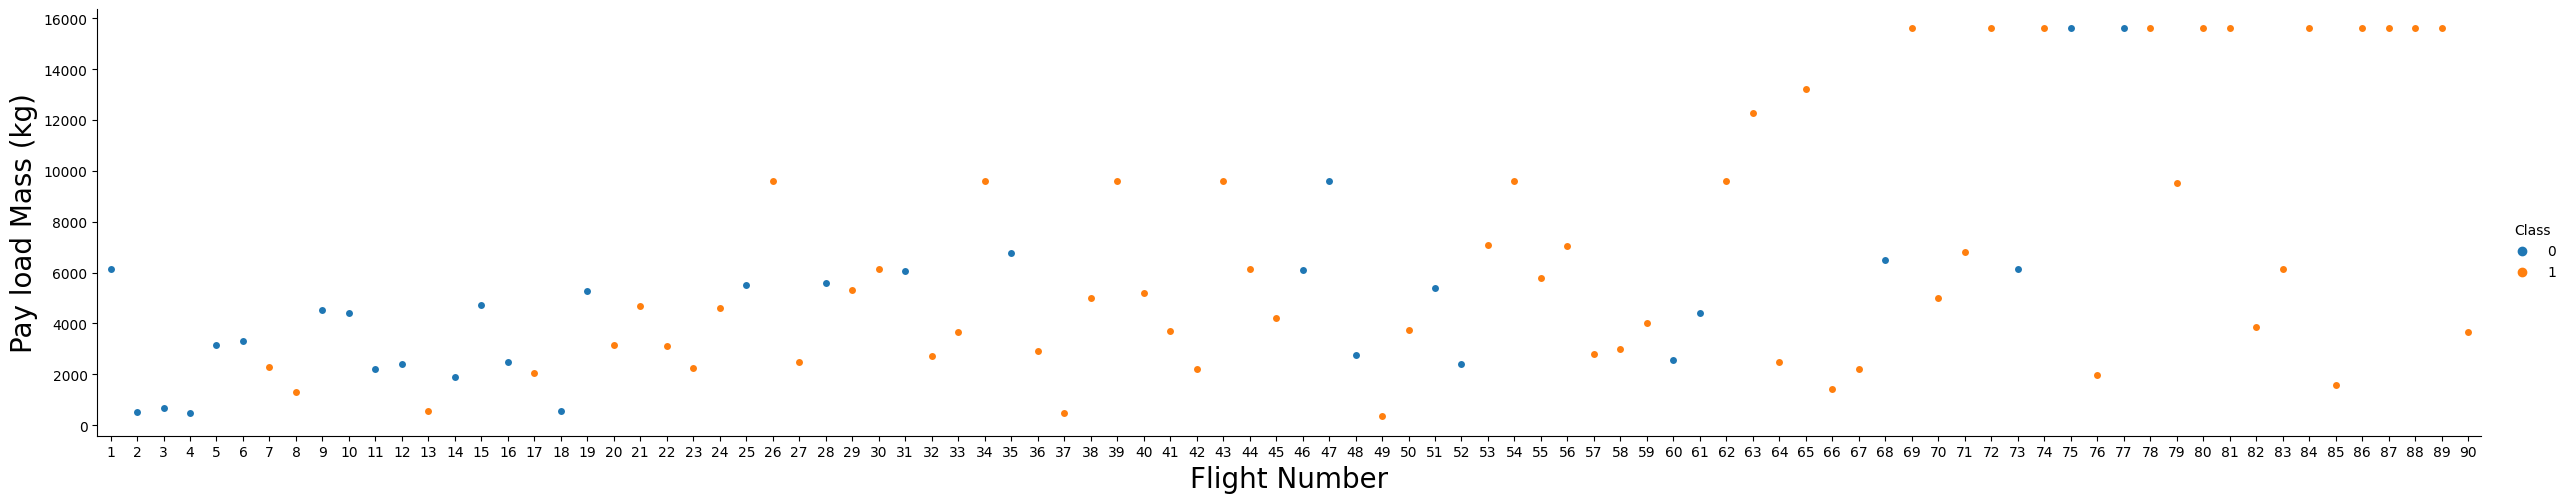

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Next, let's drill down each site to visualize its detailed launch records

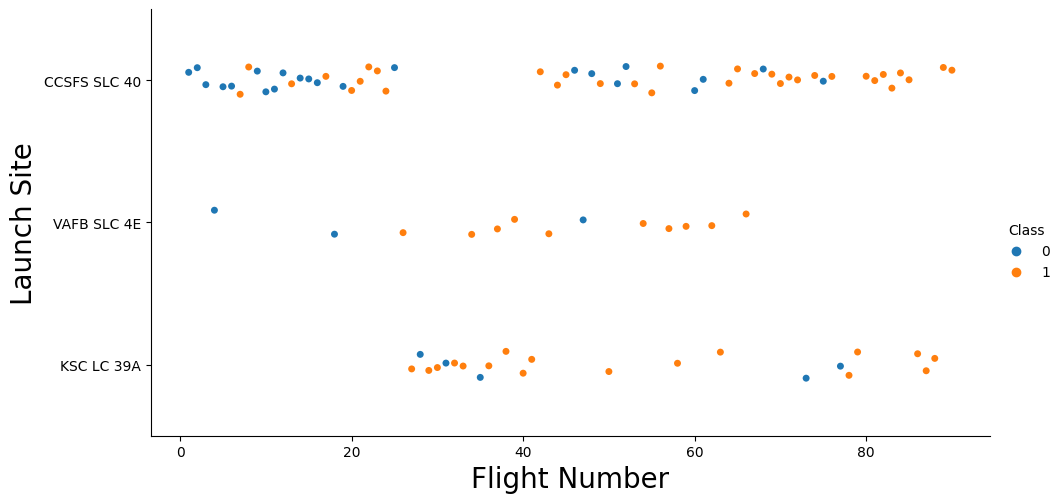

In [4]:
# Visualizing the relationship between the variables Flight Number and Launch Site
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=2)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Observations:

* Most of the earlier flights failed while most of the later flights succeeded.
* The CCAFS SLC 40 launch site has about a half of all launches.
* VAFB SLC 4E and KSC LC 39A have higher flight success rates.
* It can be assumed that each new launch has a higher rate of success.

### We also want to observe if there is any relationship between launch sites and their payload mass

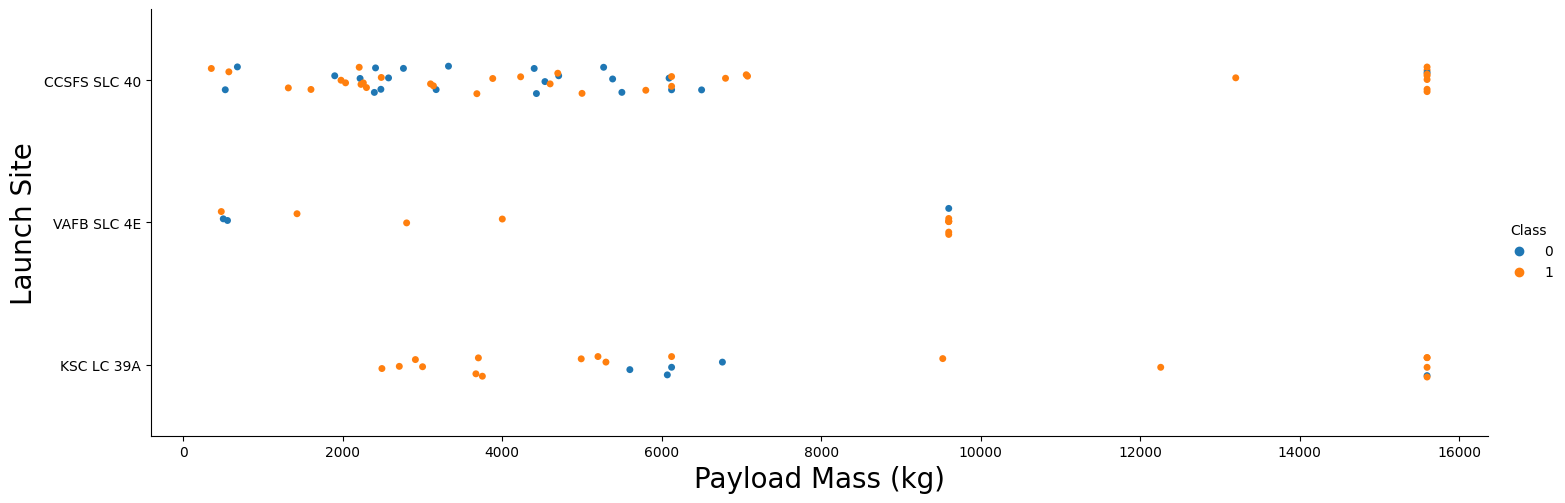

In [5]:
# Visualizing the relationship between Payload and Launch Site
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, aspect = 3)
plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

Observations:
* For every launch site the higher the payload mass, the higher the success rate.
* Most of the launches with payload mass over 7000 kg were successfull.
* KSC LC 39A has a 100% success rate for payload mass under 5500 kg too.

### Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

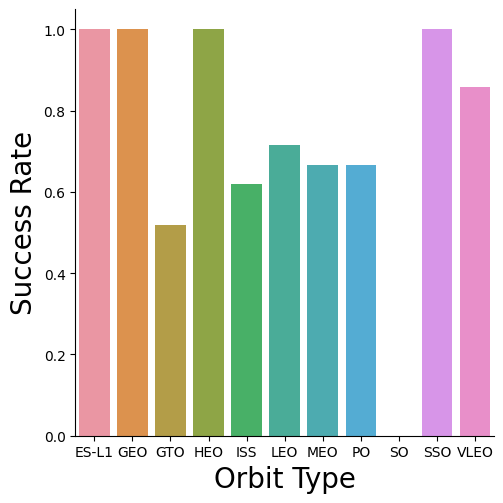

In [6]:
# Visualizing the relationship between success rate of each orbit type
sns.catplot(x= 'Orbit', y = 'Class', data = df.groupby('Orbit')['Class'].mean().reset_index(), kind = 'bar')
plt.xlabel('Orbit Type',fontsize=20)
plt.ylabel('Success Rate',fontsize=20)
plt.show()

Observations:

Orbits with 100% success rate are:
* ES-L1
* GEO
* HEO
* SSO

Orbits with 0% success rate are:
* SO

Orbits with success rate between 50% and 85%:
* GTO
* ISS
* LEO
* MEO
* PO

### For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

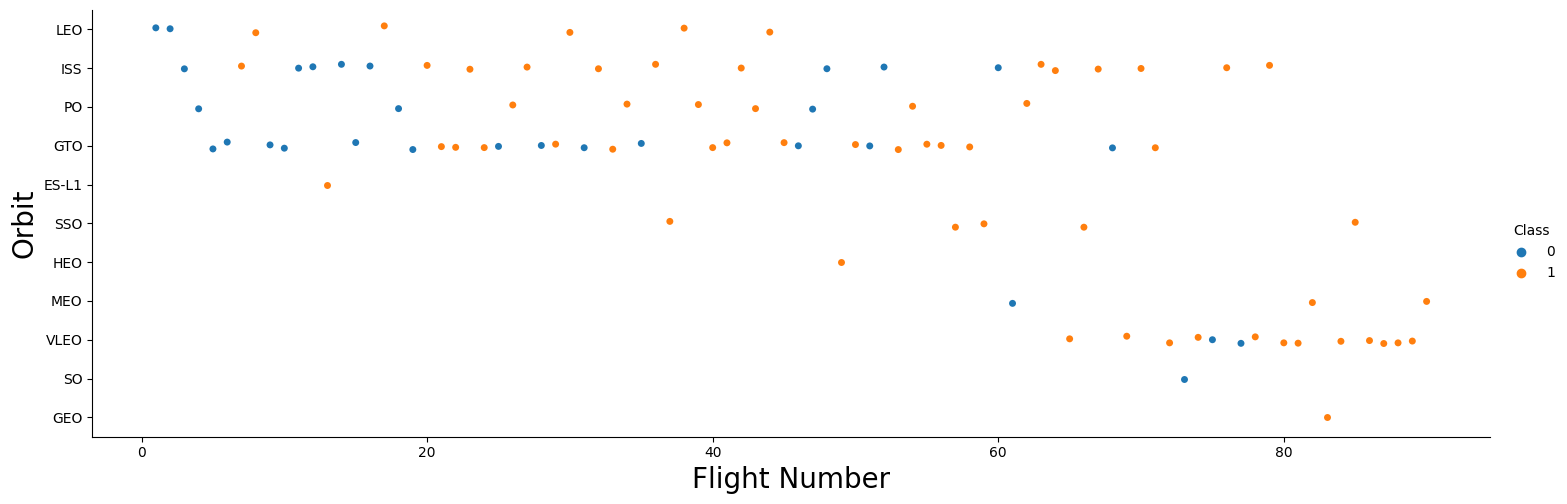

In [7]:
# Visualizing the relationship between FlightNumber and Orbit type
sns.catplot(x = 'FlightNumber', y = 'Orbit', hue = 'Class', data = df, aspect = 3)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

Observations:
* The older orbit (GTO) with many launches had a small success rate compared to the newer orbit (VLEO) with many launches
* There are many orbits that had a 100% or a 0% success rate (as observed in the previous bar chart) that had only launched 1 flights

### Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

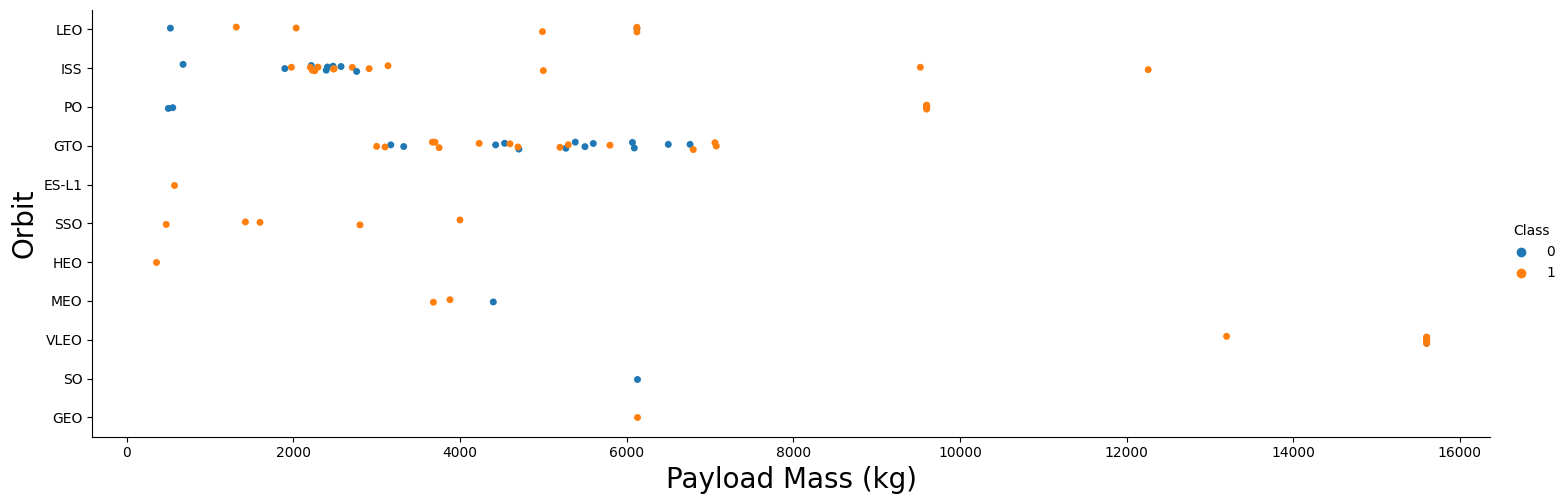

In [8]:
# Visualizing the relationship between Payload and Orbit type
sns.catplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df, aspect = 3)
plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

Observations:
* Most launches had paylod mass less than 8000 kg
* In the GTO orbit the heavier the paylod the lower the success rate
* In the ISS orbit the heavier the paylod the bigger the success rate
* Some launches (HEO orbit and VLEO orbit) were tested and succeeded under an extremely light (HEO) and extremely heavy (VLEO) payload mass

### Let's visualize the launch success yearly trend

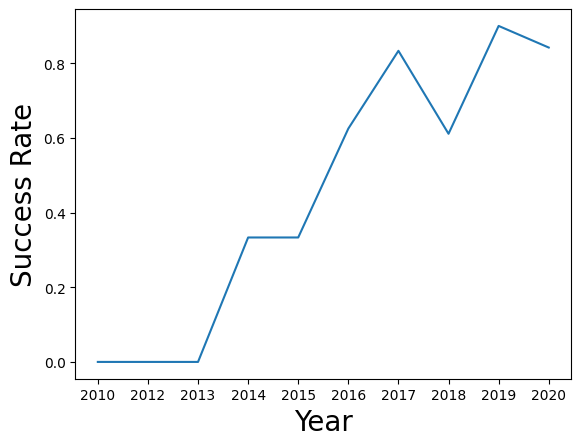

In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Plotting a line chart with x axis to be the extracted year and y axis to be the success rate
years = df.groupby(Extract_year(df['Date'])).mean(numeric_only=True)['Class']

sns.lineplot(x = years.index, y = years)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Success Rate', fontsize = 20)
plt.show()

Observations:
* During the earlier launches, the success rate is exceptionally low.
* During the later launches, the success rate is exceptionally high.






## Feature Engineering

By now, we should have obtained some preliminary insights about how each important variable would affect the success rate, so we will select the features that will be used in success prediction in the future module.

In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating dummy variables to categorical columns

In [11]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Casting all numeric columns to float64

In [12]:
features_one_hot.astype('float64')    

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### We can now export it to a CSV for the next part

In [13]:
features_one_hot.to_csv('Space_X_Megaproject_part_3.csv', index=False)